CSV file loaded successfully!

Class distribution in the dataset:
label
Web           30000
Recon         30000
Mirai         30000
BruteForce    30000
Spoofing      30000
DoS           30000
Benign        30000
DDoS          30000
Name: count, dtype: int64


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │        24,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 197,064 (769.78 KB)

 Trainable params: 197,064 (769.78 KB)

 Non-trainable params: 0 (0.00 B)


--- Training the Deep MLP Model ---
Epoch 1/100
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4390 - loss: 1.4417 - val_accuracy: 0.6345 - val_loss: 0.8727 - learning_rate: 1.0000e-04
Epoch 2/100
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6059 - loss: 0.9402 - val_accuracy: 0.6590 - val_loss: 0.8085 - learning_rate: 1.0000e-04
Epoch 3/100
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6357 - loss: 0.8655 - val_accuracy: 0.6712 - val_loss: 0.7812 - learning_rate: 1.0000e-04
Epoch 4/100
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6525 - loss: 0.8296 - val_accuracy: 0.6820 - val_loss: 0.7568 - learning_rate: 1.0000e-04
Epoch 5/100
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6699 - loss: 0.7949 - val_accuracy: 0.6858 - val_loss: 0.7414 - learning_rate: 1.0000e-04
Epoch 6/100
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6733 - loss: 0.7810 - val_accuracy: 0.6891 - val_loss: 0.7316 - learning_rate: 1.0000e-04
Epoch 7/1

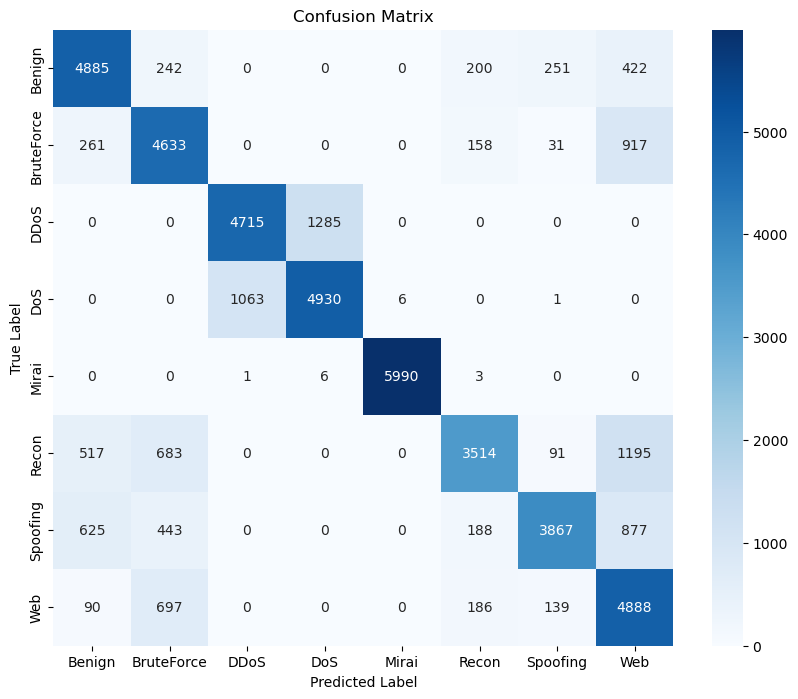


--- ROC Curve ---


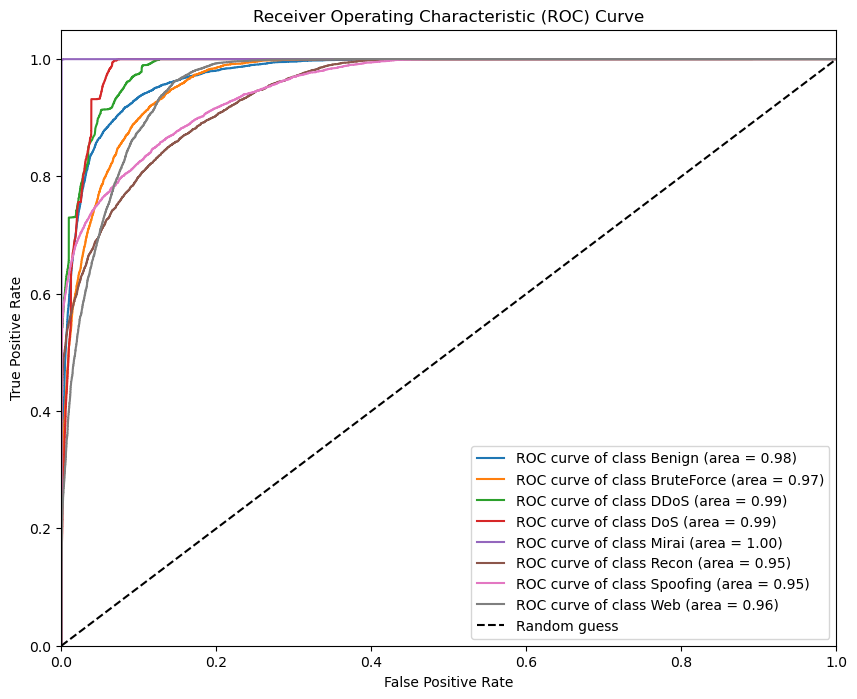

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load and Preprocess Data ---

try:
    # Use the correct path to your CSV file
    data = pd.read_csv("/Users/bodapati/Downloads/balanced_dataset3.csv")
    print("CSV file loaded successfully!")
except FileNotFoundError:
    print("Error: The CSV file was not found. Please check the file path.")
    exit()

features = ['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate', 'Drate',
            'fin_flag_number', 'syn_flag_number', 'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
            'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count', 'fin_count', 'urg_count',
            'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP',
            'ARP', 'ICMP', 'IPv', 'LLC', 'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT',
            'Number', 'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight']
target = 'label'

X = data[features]
y = data[target]

print("\nClass distribution in the dataset:")
print(y.value_counts())

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# No reshaping needed for MLP
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42, stratify=y)

# --- 2. Build and Compile the Deep MLP Model ---

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(y_categorical.shape[1], activation='softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# --- 3. Train the Model ---

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

print("\n--- Training the Deep MLP Model ---")
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=128,
                    validation_split=0.1,
                    callbacks=[reduce_lr, early_stopping],
                    verbose=1)

# --- 4. Evaluate the Model and Generate Reports ---

print("\n--- Evaluating the Model on the Test Set ---")
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.4f}')

# Make predictions
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Get the class names for the reports
class_names = label_encoder.classes_

# --- 5. Generate and Display Evaluation Metrics ---

## Classification Report
print("\n--- Classification Report ---")
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

## Confusion Matrix
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## ROC Curve
print("\n--- ROC Curve ---")
n_classes = len(class_names)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {class_names[i]} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()